<a href="https://colab.research.google.com/github/madan-genai/LangGraph/blob/main/Persistance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install langgraph langchain langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 2.7 MB/s eta 0:00:00


In [4]:
import os
os.environ["GEMINI_API_KEY"]=""

In [5]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver
from langchain_google_genai import ChatGoogleGenerativeAI

In [7]:
llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash"
)

In [8]:
class JokeState(TypedDict):
  topic:str
  joke:str
  explanation:str

In [9]:
def generate_joke(State:JokeState):
  prompt = f"generate a creative and funny joke on the topic {State["topic"]}"
  response = llm.invoke(prompt)
  return {"joke":response}

In [10]:
def generate_explanation(State:JokeState):
  prompt = f"explain in detail and clear the joke {State["joke"]}"
  response = llm.invoke(prompt)
  return {"explanation":response}

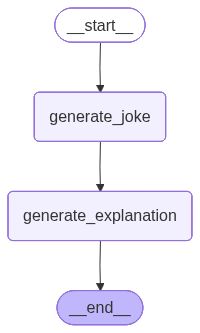

In [11]:
graph = StateGraph(JokeState)
graph.add_node("generate_joke",generate_joke)
graph.add_node("generate_explanation",generate_explanation)

graph.add_edge(START,"generate_joke")
graph.add_edge("generate_joke","generate_explanation")
graph.add_edge("generate_explanation",END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [12]:
config1 = {"configurable":{"thread_id":"1"}}
workflow.invoke({"topic":"pizza"},config=config1)

{'topic': 'pizza',
 'joke': AIMessage(content='Why did the pizza get a bad review at the stand-up comedy club?\n\nBecause all its jokes were too *cheesy*, and it kept *delivering* lines that fell flat!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c818a-4eaf-71d0-bcaf-b18e435c334e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'output_tokens': 3073, 'total_tokens': 3084, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 3034}}),
 'explanation': AIMessage(content='This joke is a classic example of **wordplay** and **personification**, relying on the double meanings of certain words related to both comedy and pizza. Let\'s break it down:\n\n**The Setup:**\n"Why did the pizza get a bad review at the stand-up comedy club?"\n\n*   **Personification:** The humor begins immediately by giving a non-human obj

In [13]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza get a bad review at the stand-up comedy club?\n\nBecause all its jokes were too *cheesy*, and it kept *delivering* lines that fell flat!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c818a-4eaf-71d0-bcaf-b18e435c334e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'output_tokens': 3073, 'total_tokens': 3084, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 3034}}), 'explanation': AIMessage(content='This joke is a classic example of **wordplay** and **personification**, relying on the double meanings of certain words related to both comedy and pizza. Let\'s break it down:\n\n**The Setup:**\n"Why did the pizza get a bad review at the stand-up comedy club?"\n\n*   **Personification:** The humor begins immediately by giv

In [14]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza get a bad review at the stand-up comedy club?\n\nBecause all its jokes were too *cheesy*, and it kept *delivering* lines that fell flat!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c818a-4eaf-71d0-bcaf-b18e435c334e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'output_tokens': 3073, 'total_tokens': 3084, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 3034}}), 'explanation': AIMessage(content='This joke is a classic example of **wordplay** and **personification**, relying on the double meanings of certain words related to both comedy and pizza. Let\'s break it down:\n\n**The Setup:**\n"Why did the pizza get a bad review at the stand-up comedy club?"\n\n*   **Personification:** The humor begins immediately by gi

In [15]:
config2 = {"configurable":{"thread_id":"2"}}
workflow.invoke({"topic":"pasta"},config=config2)

{'topic': 'pasta',
 'joke': AIMessage(content='Why did the new Italian restaurant fail so quickly?\n\nBecause all their "authentic" pasta was actually just cleverly disguised ramen noodles. Turns out, the chef was a total **impasta**!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c818a-cc27-7620-8e8b-7bfe83eb66f0-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'output_tokens': 1650, 'total_tokens': 1661, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 1611}}),
 'explanation': AIMessage(content='This joke is a classic example of **wordplay**, specifically a **pun**, which relies on a word sounding similar to another word but having a different meaning, or a word having multiple meanings within the context of the joke.\n\nLet\'s break it down:\n\n1.  **The Setup:** "Why did the new Italian restaurant 

# Time Travel

In [18]:
workflow.get_state({"configurable":{"thread_id":"1","checkpoint_id":"1f10f564-6db5-6991-8001-7b45174d76da"}})

StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza get a bad review at the stand-up comedy club?\n\nBecause all its jokes were too *cheesy*, and it kept *delivering* lines that fell flat!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c818a-4eaf-71d0-bcaf-b18e435c334e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'output_tokens': 3073, 'total_tokens': 3084, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 3034}})}, next=('generate_explanation',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f10f564-6db5-6991-8001-7b45174d76da'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-02-21T18:51:05.558039+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f10f563-e22a-6c3d-8000-74dc4686

In [21]:
workflow.invoke(None, {"configurable":{"thread_id":"1","checkpoint_id":"1f10f564-6db5-6991-8001-7b45174d76da"}})

{'topic': 'pizza',
 'joke': AIMessage(content='Why did the pizza get a bad review at the stand-up comedy club?\n\nBecause all its jokes were too *cheesy*, and it kept *delivering* lines that fell flat!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c818a-4eaf-71d0-bcaf-b18e435c334e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'output_tokens': 3073, 'total_tokens': 3084, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 3034}}),
 'explanation': AIMessage(content='This joke is a classic example of a pun, relying on words that have multiple meanings, especially one related to the subject of the joke (pizza) and another related to the situation (stand-up comedy).\n\nLet\'s break it down:\n\n**1. The Setup:**\n*   "Why did the pizza get a bad review at the stand-up comedy club?"\n    *   This immediately

In [22]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': AIMessage(content='Why did the pizza get a bad review at the stand-up comedy club?\n\nBecause all its jokes were too *cheesy*, and it kept *delivering* lines that fell flat!', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c818a-4eaf-71d0-bcaf-b18e435c334e-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 11, 'output_tokens': 3073, 'total_tokens': 3084, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 3034}}), 'explanation': AIMessage(content='This joke is a classic example of a pun, relying on words that have multiple meanings, especially one related to the subject of the joke (pizza) and another related to the situation (stand-up comedy).\n\nLet\'s break it down:\n\n**1. The Setup:**\n*   "Why did the pizza get a bad review at the stand-up comedy club?"\n    

# Fault Tolerance

In [23]:
from langgraph.graph import StateGraph,START , END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [24]:
class CrashState(TypedDict):
  input:str
  step1:str
  step2:str

In [29]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

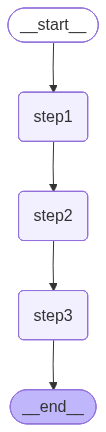

In [31]:
graph = StateGraph(CrashState)
graph.add_node("step1",step_1)
graph.add_node("step2",step_2)
graph.add_node("step3",step_3)

graph.add_edge(START, "step1")
graph.add_edge("step1", "step2")
graph.add_edge("step2", "step3")
graph.add_edge("step3", END)

checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)
workflow